In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

imdb_review_df = pd.read_csv('Data/IMDB Dataset.csv')
imdb_review_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [39]:
imdb_review_df['sentiment'] = imdb_review_df['sentiment'].replace({'positive': 1, 'negative': 0}).astype(int)
imdb_review_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [40]:
imdb_review_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [41]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', imdb_review_df['sentiment'].value_counts())
# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', imdb_review_df['sentiment'].value_counts() / len(imdb_review_df))

Number of positive and negative reviews:  sentiment
1    25000
0    25000
Name: count, dtype: int64
Proportion of positive and negative reviews:  sentiment
1    0.5
0    0.5
Name: count, dtype: float64


In [42]:
length_reviews = imdb_review_df['review'].str.len()

# How long is the longest review?
print(f"There are {len(length_reviews)} reviews in the dataframe.")
print(f"The longest review is {max(length_reviews)} characters long.")

There are 50000 reviews in the dataframe.
The longest review is 13704 characters long.


In [43]:
from textblob import TextBlob

def get_sentiment(review):
    sentiment = TextBlob(review).sentiment
    return sentiment

imdb_review_polarity = imdb_review_df['review'].apply(get_sentiment)
imdb_review_polarity.head()

0    (0.023433179723502305, 0.4903686635944701)
1      (0.1097222222222222, 0.5593434343434344)
2     (0.35400793650793644, 0.6587301587301588)
3             (-0.0578125, 0.45416666666666666)
4     (0.2179522497704316, 0.45291551882460973)
Name: review, dtype: object

In [44]:
print(f"Sentiment of first review: {imdb_review_polarity[0]}")
print(f"Sentiment of second review: {imdb_review_polarity[1]}")
print(f"Sentiment of last review: {imdb_review_polarity.iloc[-1]}")

Sentiment of first review: Sentiment(polarity=0.023433179723502305, subjectivity=0.4903686635944701)
Sentiment of second review: Sentiment(polarity=0.1097222222222222, subjectivity=0.5593434343434344)
Sentiment of last review: Sentiment(polarity=0.12000000000000001, subjectivity=0.6376923076923077)


In [45]:
longest_review = max(imdb_review_df['review'], key=len)
print(longest_review)
print('\n')
longest_review_blob = TextBlob(longest_review)
print(f"Sentiment of the longest film review: {longest_review_blob.sentiment}.")

Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, but

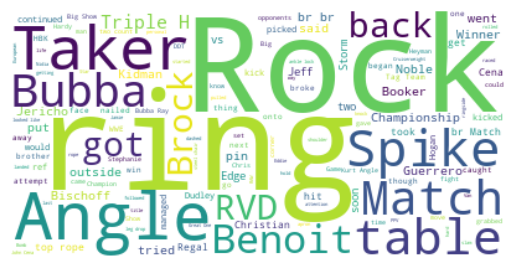

In [46]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

longest_review_wc = WordCloud(
    background_color='white', 
    stopwords=set(stopwords.words('english'))
    ).generate(longest_review)

plt.imshow(longest_review_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit([imdb_review_df['review'][0]])
first_review_bow = vectorizer.transform([imdb_review_df['review'][0]])
print(first_review_bow.toarray())

[[ 1  1  1  1  1  1  1  6  1  2  1  1  4  1  2  2  1  1  1  6  1  2  1  1
   1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  2  1  1  1
   1  1  1  1  1  2  1  5  3  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
   1  2  1  1  1  3  1  2  1  1  1  9  6  1  2  2  1  1  1  1  3  1  1  1
   1  1  1  1  4  1  1  1  2  1  1  1  1  1  1  3  7  3  1  3  1  1  2  1
   6  1  1  1  1  3  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  3
   1  1  1  3  1  1  1  1  2  1  1  4  1 16  1  1  1  3  1  6  1  1  1  1
   1  1  1  4  3  1  2  1  2  2  1  2  5  2  1  1  3  1]]


In [48]:
reviews_vect = CountVectorizer(
    max_features=1000, 
    ngram_range=(1,2), 
    max_df=500, min_df=25, 
    stop_words='english',
    token_pattern=r'\b[^\d\W][^\d\W]+\b'
    )

reviews_vect.fit(imdb_review_df['review'])
X_reviews = reviews_vect.transform(imdb_review_df['review'])

X_count_df = pd.DataFrame(X_reviews.toarray(), columns=reviews_vect.get_feature_names_out())
print(X_count_df.head())

   abandoned  abuse  accents  accidentally  account  acting bad  action movie  \
0          0      0        0             0        0           0             0   
1          0      0        0             0        0           0             0   
2          0      0        0             0        0           0             0   
3          0      0        0             0        0           0             0   
4          0      0        0             0        0           0             0   

   action scenes  adam  adventures  ...  work br  world war  worst film  \
0              0     0           0  ...        0          0           0   
1              0     0           0  ...        0          0           0   
2              0     0           0  ...        0          0           0   
3              0     0           0  ...        0          0           0   
4              0     0           0  ...        0          0           0   

   worst movies  worthwhile  wwii  young man  young woman  you

In [49]:
print('Length of vectorizer: ', reviews_vect.get_feature_names_out())

Length of vectorizer:  ['abandoned' 'abuse' 'accents' 'accidentally' 'account' 'acting bad'
 'action movie' 'action scenes' 'adam' 'adventures' 'africa' 'african'
 'aged' 'ages' 'ain' 'aka' 'al' 'alan' 'albert' 'alex' 'alice' 'aliens'
 'allen' 'allows' 'alright' 'amateur' 'amateurish' 'amazed' 'amazingly'
 'ancient' 'anderson' 'andy' 'angel' 'anger' 'angle' 'angles' 'anime'
 'ann' 'anna' 'anne' 'anthony' 'appealing' 'appreciated' 'appropriate'
 'arms' 'arrives' 'arthur' 'arts' 'asian' 'asking' 'asleep' 'assume'
 'atrocious' 'attitude' 'australian' 'author' 'awards' 'awkward' 'bad br'
 'bad film' 'bad good' 'bad movies' 'ball' 'bank' 'barbara' 'barry'
 'baseball' 'batman' 'bbc' 'beach' 'bear' 'beast' 'beginning end'
 'behavior' 'belief' 'believed' 'believes' 'best film' 'best friend'
 'best movie' 'bet' 'better br' 'betty' 'big fan' 'big screen' 'birth'
 'blah' 'blind' 'blockbuster' 'blonde' 'blow' 'blown' 'boat' 'bob'
 'bodies' 'bomb' 'bond' 'bothered' 'box office' 'br bad' 'br best'
 

In [50]:
from nltk import word_tokenize

print(word_tokenize(imdb_review_df['review'][0]))

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', 'you', "'ll", 'be', 'hooked', '.', 'They', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', '.', 'Trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'Its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', '.', 

In [51]:
reviews_tokens = [word_tokenize(review) for review in imdb_review_df['review']]
print(reviews_tokens[1])

['A', 'wonderful', 'little', 'production', '.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'The', 'filming', 'technique', 'is', 'very', 'unassuming-', 'very', 'old-time-BBC', 'fashion', 'and', 'gives', 'a', 'comforting', ',', 'and', 'sometimes', 'discomforting', ',', 'sense', 'of', 'realism', 'to', 'the', 'entire', 'piece', '.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'The', 'actors', 'are', 'extremely', 'well', 'chosen-', 'Michael', 'Sheen', 'not', 'only', '``', 'has', 'got', 'all', 'the', 'polari', "''", 'but', 'he', 'has', 'all', 'the', 'voices', 'down', 'pat', 'too', '!', 'You', 'can', 'truly', 'see', 'the', 'seamless', 'editing', 'guided', 'by', 'the', 'references', 'to', 'Williams', "'", 'diary', 'entries', ',', 'not', 'only', 'is', 'it', 'well', 'worth', 'the', 'watching', 'but', 'it', 'is', 'a', 'terrificly', 'written', 'and', 'performed', 'piece', '.', 'A', 'masterful', 'production', 'about', 'one', 'of', 'the', 'great', 'master', "'s", 'of', 'comedy', 'and', 'his', 'life', '

In [52]:
cleaned_tokens = [[word for word in review if word.isalpha()] for review in reviews_tokens]
print(cleaned_tokens[1])

['A', 'wonderful', 'little', 'production', 'br', 'br', 'The', 'filming', 'technique', 'is', 'very', 'very', 'fashion', 'and', 'gives', 'a', 'comforting', 'and', 'sometimes', 'discomforting', 'sense', 'of', 'realism', 'to', 'the', 'entire', 'piece', 'br', 'br', 'The', 'actors', 'are', 'extremely', 'well', 'Michael', 'Sheen', 'not', 'only', 'has', 'got', 'all', 'the', 'polari', 'but', 'he', 'has', 'all', 'the', 'voices', 'down', 'pat', 'too', 'You', 'can', 'truly', 'see', 'the', 'seamless', 'editing', 'guided', 'by', 'the', 'references', 'to', 'Williams', 'diary', 'entries', 'not', 'only', 'is', 'it', 'well', 'worth', 'the', 'watching', 'but', 'it', 'is', 'a', 'terrificly', 'written', 'and', 'performed', 'piece', 'A', 'masterful', 'production', 'about', 'one', 'of', 'the', 'great', 'master', 'of', 'comedy', 'and', 'his', 'life', 'br', 'br', 'The', 'realism', 'really', 'comes', 'home', 'with', 'the', 'little', 'things', 'the', 'fantasy', 'of', 'the', 'guard', 'which', 'rather', 'than', 'u

In [53]:
"""
english_stopwords = set(stopwords.words('english'))

reviews_wc = WordCloud(background_color='white', stopwords=english_stopwords).generate(all_reviews_text)
plt.imshow(reviews_wc, interpolation='bilinear')
plt.axis('off')
plt.show()"""

"""# Create a concatenated string of all reviews
all_reviews_text = ' '.join(imdb_review_df['review'])

# Tokenize the concatenated text
tokenized_reviews = word_tokenize(all_reviews_text)

# Print the tokenized reviews
print(tokenized_reviews)"""

"""from nltk.stem import WordNetLemmatizer
WNLemmatizer = WordNetLemmatizer()
lem_tokens = [WNLemmatizer.lemmatize(token) for sublist in cleaned_tokens for token in sublist]"""

'from nltk.stem import WordNetLemmatizer\nWNLemmatizer = WordNetLemmatizer()\nlem_tokens = [WNLemmatizer.lemmatize(token) for sublist in cleaned_tokens for token in sublist]'

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(
    max_features=1000, 
    ngram_range=(1,2), 
    max_df=500, min_df=25, 
    stop_words='english',
    token_pattern=r'\b[^\d\W][^\d\W]+\b'
)

reviews_tfidf = tfidf_model.fit_transform(imdb_review_df['review'])

X_tfidf = pd.DataFrame(reviews_tfidf.toarray(), columns=tfidf_model.get_feature_names_out())
print(X_tfidf.head())

   abandoned  abuse  accents  accidentally  account  acting bad  action movie  \
0        0.0    0.0      0.0           0.0      0.0         0.0           0.0   
1        0.0    0.0      0.0           0.0      0.0         0.0           0.0   
2        0.0    0.0      0.0           0.0      0.0         0.0           0.0   
3        0.0    0.0      0.0           0.0      0.0         0.0           0.0   
4        0.0    0.0      0.0           0.0      0.0         0.0           0.0   

   action scenes  adam  adventures  ...  work br  world war  worst film  \
0            0.0   0.0         0.0  ...      0.0        0.0         0.0   
1            0.0   0.0         0.0  ...      0.0        0.0         0.0   
2            0.0   0.0         0.0  ...      0.0        0.0         0.0   
3            0.0   0.0         0.0  ...      0.0        0.0         0.0   
4            0.0   0.0         0.0  ...      0.0        0.0         0.0   

   worst movies  worthwhile  wwii  young man  young woman  you

In [55]:
print('Top 5 rows using BOW: \n', X_count_df.head(5))
print('Top 5 rows using TF-IDF: \n', X_tfidf.head(5))

Top 5 rows using BOW: 
    abandoned  abuse  accents  accidentally  account  acting bad  action movie  \
0          0      0        0             0        0           0             0   
1          0      0        0             0        0           0             0   
2          0      0        0             0        0           0             0   
3          0      0        0             0        0           0             0   
4          0      0        0             0        0           0             0   

   action scenes  adam  adventures  ...  work br  world war  worst film  \
0              0     0           0  ...        0          0           0   
1              0     0           0  ...        0          0           0   
2              0     0           0  ...        0          0           0   
3              0     0           0  ...        0          0           0   
4              0     0           0  ...        0          0           0   

   worst movies  worthwhile  wwii  you

In [56]:
# Split data into training and testing sets - DONE
# Logistic Regression - DONE
# Naive Bayes
# Support Vector Machines
# Random Forest
# Gradient Boosting Machines
# NLP tasks for topic modelling and NER

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(imdb_review_df['review'], imdb_review_df['sentiment'], test_size=0.2, random_state=42)

# Creating the Count X_train and X_test
X_train_counts = reviews_vect.fit_transform(X_train)
X_test_counts = reviews_vect.transform(X_test)

# Creating the TF-IDF X_train and X_test
X_train_tfidf = tfidf_model.fit_transform(X_train)
X_test_tfidf = tfidf_model.transform(X_test)

In [58]:
lr_model = LogisticRegression()
lr_model.fit(X_train_counts, y_train)

LogisticRegression()

In [59]:
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [60]:
y_pred_counts = lr_model.predict(X_test_counts)
print("Counts Accuracy: ", accuracy_score(y_test, y_pred_counts))
print('\n')
counts_cm = confusion_matrix(y_test, y_pred_counts)
print(counts_cm)

Counts Accuracy:  0.7333


[[3565 1396]
 [1271 3768]]


In [61]:
y_pred_tfidf = lr_model.predict(X_test_tfidf)
print("TF-IDF Accuracy: ", accuracy_score(y_test, y_pred_tfidf))
print('\n')
tfidf_cm = confusion_matrix(y_test, y_pred_tfidf)
print(tfidf_cm)

TF-IDF Accuracy:  0.7342


[[3518 1443]
 [1215 3824]]


In [62]:
print("Counts Classification Report: \n", classification_report(y_test, y_pred_counts))
print('\n')
print("TF-IDF Classification Report: \n", classification_report(y_test, y_pred_tfidf))

Counts Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      4961
           1       0.73      0.75      0.74      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



TF-IDF Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      4961
           1       0.73      0.76      0.74      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [63]:
print('Counts AUC Score:', roc_auc_score(y_test, y_pred_counts))
print('TF-IDF AUC Score:', roc_auc_score(y_test, y_pred_tfidf))

Counts AUC Score: 0.7331862670524875
TF-IDF AUC Score: 0.7340059769236361
